In [94]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


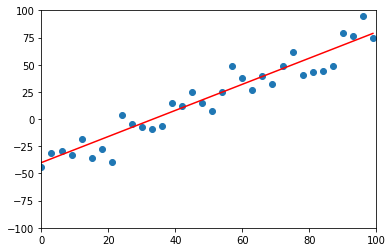

In [95]:
# plot settings
plt.xlim(0,100)
plt.ylim(-100,100)

# plot initial line
line_xs = np.arange(0,100)
line_ys = line_xs * 1.2 - 40
plt.plot(line_xs,line_ys,c='red');

# generate training data
train_inputs = line_xs[::3]
train_outputs = line_ys[::3] + np.random.randn(len(line_ys[::3])) * 10
# plot training data
plt.scatter(train_inputs,train_outputs);

## Gradient Descent Method

In [96]:
def normalize_data(data, ref=None):
    if ref is None:
        ref = data
    ref_range = np.max(ref,0) - np.min(ref,0)
    ref_mean = np.mean(ref,0)
    return (data - ref_mean) / ref_range

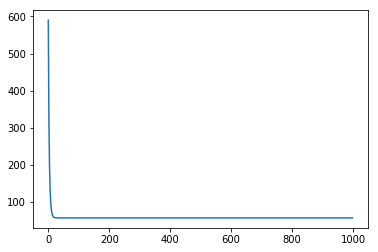

In [97]:
train_inputs_norm = np.stack((np.ones(len(train_inputs)), normalize_data(train_inputs)),1)
# weights
weights = np.array([0.0,0.0])
# learning rate
lr = 1.6
# cost per iteration
costs = []
# maximum iteration limit
maxiter = 1000
#iteration loop
for i in range(maxiter):
    dots = np.dot(train_inputs_norm, weights) - train_outputs
    weights -= np.multiply(lr, [np.mean(dots * x) for x in train_inputs_norm.T])
    cost = 0.5 * np.mean(np.square(np.dot(train_inputs_norm, weights) - train_outputs))
    costs.append(cost)

plt.plot(np.arange(maxiter), costs);

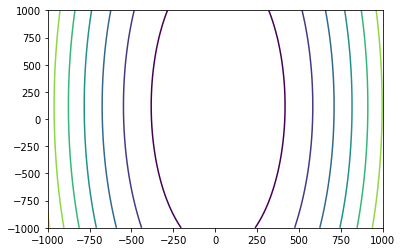

In [98]:
def costf(a):
    return 0.5 * np.mean(np.square(np.dot(train_inputs_norm, a) - train_outputs))
    
xlist = np.linspace(-1000,1000,100)
ylist = np.linspace(-1000,1000,100)
X, Y = np.meshgrid(xlist, ylist)
Q = np.concatenate((X[:,:,np.newaxis],Y[:,:,np.newaxis]),2)
Z = np.apply_along_axis(costf,2,Q)
plt.contour(X,Y,Z);

In [103]:
x = np.stack((np.ones(len(train_inputs)), train_inputs),1)
y = train_outputs
np.dot(np.dot(np.linalg.inv(np.dot(x.T,x)),x.T),y)

array([-42.22735641,   1.21777303])

In [99]:
weights

array([  18.05240836,  120.55952954])

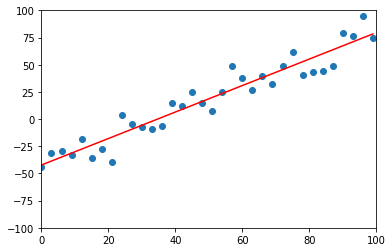

In [100]:
# plot settings
plt.xlim(0,100)
plt.ylim(-100,100)

# normalize line xs in regards to training data
line_xs_norm = np.stack((np.ones(len(line_xs)), normalize_data(line_xs,train_inputs)),1)
# plot hypothesis
plt.plot(line_xs, np.dot(line_xs_norm,weights),c='red');
# plot training data
plt.scatter(train_inputs,train_outputs);

## Normal Equation Method

In [115]:
x = np.stack((np.ones(len(train_inputs)), train_inputs),1)
y = train_outputs
w = np.dot(np.dot(np.linalg.inv(np.dot(x.T,x)),x.T),y)

array([-42.22735641, -38.57403733, -34.92071826, -31.26739918,
       -27.6140801 , -23.96076103, -20.30744195, -16.65412287,
       -13.0008038 ,  -9.34748472,  -5.69416564,  -2.04084656,
         1.61247251,   5.26579159,   8.91911067,  12.57242974,
        16.22574882,  19.8790679 ,  23.53238698,  27.18570605,
        30.83902513,  34.49234421,  38.14566328,  41.79898236,
        45.45230144,  49.10562051,  52.75893959,  56.41225867,
        60.06557775,  63.71889682,  67.3722159 ,  71.02553498,
        74.67885405,  78.33217313])

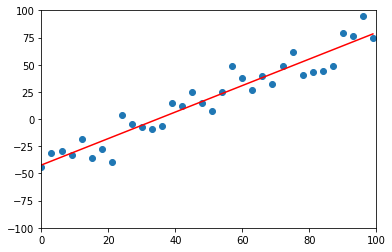

In [117]:
# plot settings
plt.xlim(0,100)
plt.ylim(-100,100)

# plot hypothesis
plt.plot(line_xs, np.dot(np.stack((np.ones(len(line_xs)), line_xs),1),w),c='red');
# plot training data
plt.scatter(train_inputs,train_outputs);